# Logistic Regression

- We have simulated $T_d-WTe_2$ from 1 layers to 10 layers (1L to 10L) by adding variable amounts of Poisson noise and Gaussian noises.
- Poisson noise two sets - 1* $10^6$ e/$A^2$ and 1* $10^7$ e/$A^2$
- Each Poisson set + 0%, 1%, 2%, 3%, 4%, 5%, 6% Gaussian noise
- Each set = 288 line profiles, 288*7*2= 4032 samples
- all these samples are stored in the npy file "0_6%_gauss_examples_4_peaks_1106_1107_pois_scaled.npy"

# Logistic Regression

All the features: ['layer_number' 'Std_residual' 'S1' 'S2' 'S3' 'S4' 'A1/A2' 'A1/A3' 'A1/A4'
 'A2/A3' 'A2/A4' 'A3/A4' 'area1/area2' 'area1/area3' 'area1/area4'
 'area2/area3' 'area2/area4' 'area3/area4' 'C1_C2' 'C1_C3' 'C1_C4' 'C2_C3'
 'C2_C4' 'C3_C4']

Counter({8.0: 368, 7.0: 364, 4.0: 362, 10.0: 362, 5.0: 360, 6.0: 358, 9.0: 354, 2.0: 350, 3.0: 347})

X_train shape:(3225, 23)
X_test shape:(807, 23)

Cross_validation results: [0.93498452 0.92879257 0.94736842 0.9628483  0.94736842 0.94099379
 0.94099379 0.95652174 0.94720497 0.95962733]

Training accuracy - Model: Logistic regression- mean=0.947, standard deviation=0.010
Model: Logistic regression, Test accuracy : 0.953



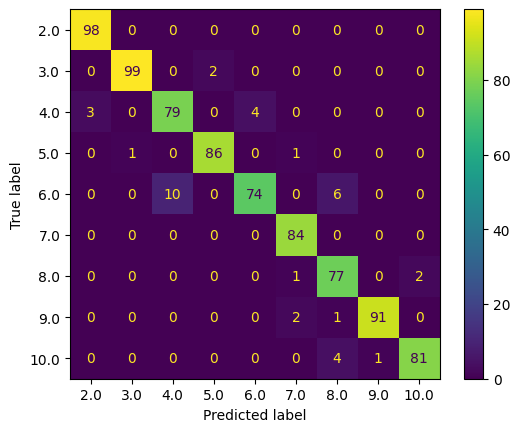

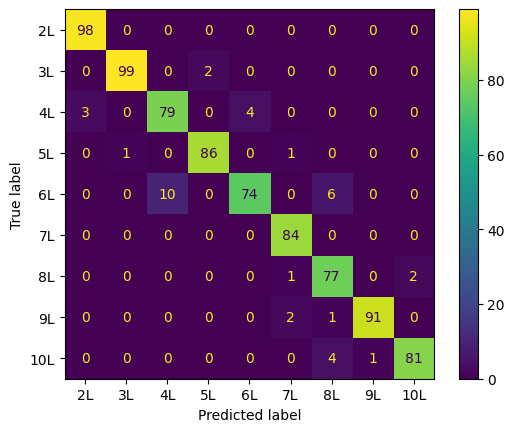

In [1]:
# importing the necessary modules
import numpy as np                                                                     
from numpy import mean
from numpy import std
import sklearn
from sklearn import metrics  # importing metrics to see the accuracy 
from sklearn.preprocessing import StandardScaler  # importing StandardScaler to normalize the samples 
from sklearn.model_selection import train_test_split  # importing train_test_split to split the data into training and test set
from collections import Counter  # importing counter to see each unique type in the data  
import matplotlib.pyplot as plt  # importing matplotlib to plot any graphs
from sklearn import model_selection  # importing model_section to use cross validation                                                 
from sklearn.linear_model import LogisticRegression  # importing logistic regression from scikit learn
from sklearn.metrics import confusion_matrix  # importing confusion matrix 
import seaborn as sns  # importing seaborn for visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = np.load("0_6%_gauss_examples_4_peaks_1106_1107_pois_scaled_29A.npy")  # loading the data file
print(f"All the features: {data[0]}\n")

data_no_header = np.delete(data, 0, 0) # deleting the first row that contains the header - np.delete(array, object= (row_number or column number), axis = 0 (along the row) or 1 (along the column)
data_features = data_no_header[:, 1:]  # selecting the features of interest
data_feature_names =  data[:, 1:]  # Checking the feature names 


# Normalizing the features of interest
X = np.array(data_features, dtype=float)  # all the training examples defined as 'X"
scaler = StandardScaler()  # Loading standard scaler to normalised the feature values
X_norm = scaler.fit_transform(X)  # the normalised data defined as 'X_norm' 
y = np.array(data_no_header[ : ,0], dtype=float) # all the labelled values defined as 'y'

# Performing the train_test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42)

# printing the shape of the dataset
print(Counter(y_train))
print(f'\nX_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}\n')

# preparing the model                                                               
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=42)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # carrying out cross validation 
print(f"Cross_validation results: {cv_results}\n")    
cv_mean, cv_std = cv_results.mean(), cv_results.std()  # printing the cross validation mean and the standard deviation
print(f"Training accuracy - Model: Logistic regression- mean={cv_mean:0.3f}, standard deviation={cv_std:0.3f}")  

# fitting the model to x_train and y_train data
model.fit(X_train, y_train)                                                                                                                                                                                             
y_pred = model.predict(X_test)  # Using the model to predict the X-test                                                                                               
test_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)  # Evaluating the test accuracy.                      
print(f"Model: Logistic regression, Test accuracy : {test_accuracy:0.3f}\n")

# Defining the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred) 
labels = ['2L','3L', '4L', '5L', '6L', '7L', '8L', '9L', '10L']

# Different ways to display the confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

disp1.plot()

# sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
# plt.title('Confusion matrix', fontname="Arial", fontsize = 20) # title with fontsize 20
# plt.xlabel('Predicted labels', fontname="Arial", fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('True labels', fontname="Arial", fontsize = 15) # y-axis label with fontsize 15
# plt.show()


# Feature Selection

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector  # importing sequential feature selector to select features sequentially
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler  # importing StandardScaler to normalize the samples 
from sklearn.model_selection import train_test_split  # importing train_test_split to split the data into training and test set
from collections import Counter  # importing counter to see each unique type in the data  

data = np.load("0_6%_gauss_examples_4_peaks_1106_1107_pois_scaled_29A.npy")  # loading the data file
print(f"All the features: {data[0]}\n")

data_no_header = np.delete(data, 0, 0) # deleting the first row that contains the header - np.delete(array, object= (row_number or column number), axis = 0 (along the row) or 1 (along the column)
data_features = data_no_header[:, 1:]  # selecting the features of interest
data_feature_names =  data[:, 1:]  # Checking the feature names 


# Normalizing the features of interest
X = np.array(data_features, dtype=float)  # all the training examples defined as 'X"
scaler = StandardScaler()  # Loading standard scaler to normalised the feature values
X_norm = scaler.fit_transform(X)  # the normalised data defined as 'X_norm' 
y = np.array(data_no_header[ : ,0], dtype=float) # all the labelled values defined as 'y'

# Performing the train_test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)

# printing the shape of the dataset
print(Counter(y_train))
print(f'\nX_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}\n')


# Selecting important features
# Forward Selection
sfs_forward = SequentialFeatureSelector(
    estimator=LogisticRegression(multi_class='multinomial', solver='newton-cg'), n_features_to_select=10, direction="forward"
).fit(X_train, y_train)


# Backward Selection
sfs_backward = SequentialFeatureSelector(
    estimator=LogisticRegression(multi_class='multinomial', solver='newton-cg'), n_features_to_select=10, direction="backward"
).fit(X_train, y_train)

# data_modified = np.delete(data, 0, 1)

feature_names = data[0, 1: ]

print("Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}")

print("Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}")

All the features: ['layer_number' 'Std_residual' 'S1' 'S2' 'S3' 'S4' 'A1/A2' 'A1/A3' 'A1/A4'
 'A2/A3' 'A2/A4' 'A3/A4' 'area1/area2' 'area1/area3' 'area1/area4'
 'area2/area3' 'area2/area4' 'area3/area4' 'C1_C2' 'C1_C3' 'C1_C4' 'C2_C3'
 'C2_C4' 'C3_C4']

Counter({7.0: 328, 5.0: 323, 4.0: 322, 10.0: 317, 8.0: 311, 3.0: 309, 6.0: 308, 9.0: 305, 2.0: 299})

X_train shape:(2822, 23)
X_test shape:(1210, 23)

Features selected by forward sequential selection: ['S3' 'S4' 'A1/A3' 'A1/A4' 'A2/A3' 'area1/area4' 'area2/area3'
 'area2/area4' 'C1_C3' 'C2_C4']
Features selected by backward sequential selection: ['S1' 'S3' 'S4' 'A2/A3' 'A2/A4' 'area1/area4' 'area2/area4' 'C1_C2'
 'C1_C4' 'C3_C4']


# Neural network model

All the features: ['layer_number' 'Std_residual' 'S1' 'S2' 'S3' 'S4' 'A1/A2' 'A1/A3' 'A1/A4'
 'A2/A3' 'A2/A4' 'A3/A4' 'area1/area2' 'area1/area3' 'area1/area4'
 'area2/area3' 'area2/area4' 'area3/area4' 'C1_C2' 'C1_C3' 'C1_C4' 'C2_C3'
 'C2_C4' 'C3_C4']


 10 features selected for training the model: ['S3' 'S4' 'A1/A3' 'A1/A4' 'A2/A3' 'area1/area4' 'area2/area3'
 'area2/area4' 'C1_C3' 'C2_C4']


The shape of training set: (2822, 10)
The shape of test set: (1210, 10)

The shape of training set: (2257, 10)
The shape of validation set: (565, 10)

Epoch 1/60
23/23 [==============================] - 2s 15ms/step - loss: 2.1545 - accuracy: 0.1283 - val_loss: 2.0937 - val_accuracy: 0.1982
Epoch 2/60
23/23 [==============================] - 0s 4ms/step - loss: 2.0277 - accuracy: 0.2615 - val_loss: 1.9733 - val_accuracy: 0.2850
Epoch 3/60
23/23 [==============================] - 0s 3ms/step - loss: 1.8814 - accuracy: 0.3384 - val_loss: 1.8121 - val_accuracy: 0.3204
Epoch 4/60
23/23 [============

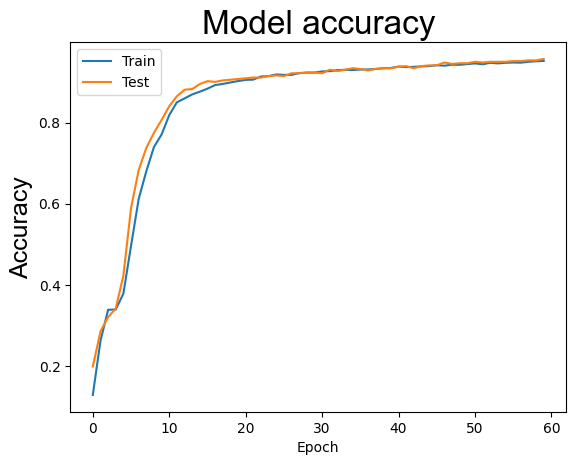

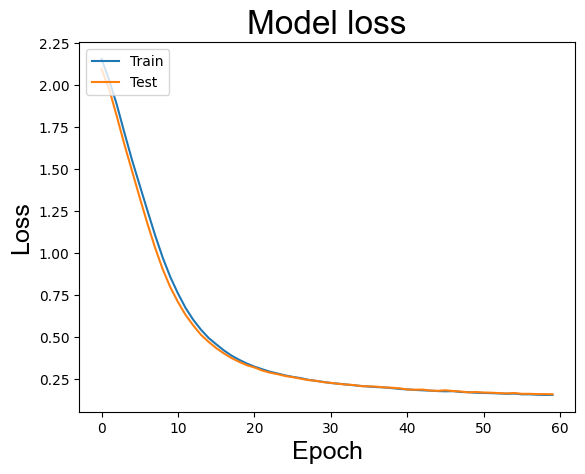

38/38 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9455
Test loss: 0.1537
Test accuracy: 0.9455
Confusion matrix:
[[149   0   0   0   0   0   0   0   0]
 [  0 137   0   2   0   0   0   0   0]
 [  4   0 116   0   6   0   0   0   0]
 [  0   5   0 119   0   1   0   0   0]
 [  0   0  13   0 120   0   7   0   0]
 [  0   0   0   1   0 116   1   2   0]
 [  0   0   0   0   2   0 130   0   5]
 [  0   0   0   0   0   3   3 135   2]
 [  0   0   0   0   0   0   9   0 122]]


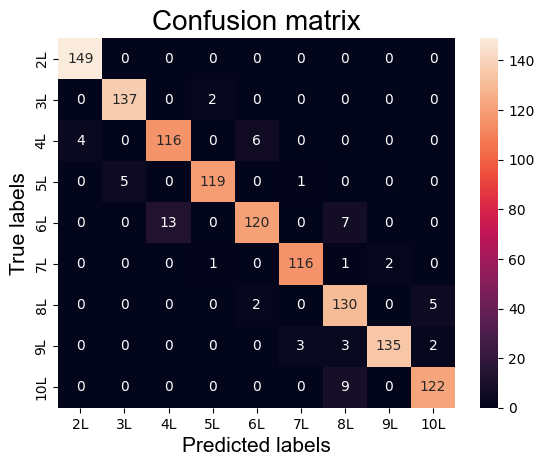

In [7]:
# importing the necessary packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler   # importing StandardScaler to normalize the samples 
from sklearn.model_selection import train_test_split
from collections import Counter   # importing counter to see each unique type in the data  
from sklearn.preprocessing import OneHotEncoder # importing OneHotEncoder to represent categorical variables as numerical values
import seaborn as sns # for visualization


data = np.load("0_6%_gauss_examples_4_peaks_1106_1107_pois_scaled_29A.npy") # loading the npy file with all features
print(f"All the features: {data[0]}\n")
data_no_header = np.delete(data, 0, 0) # deleting the first row that contains the header - np.delete(array, object= (row_number or column number), axis = 0 (along the row) or 1 (along the column)

data_features = data_no_header[:, [4, 5, 7, 8, 9, 14, 15, 16, 19, 22]]  # selecting the features of interest
data_feature_names =  data[:, [4, 5, 7, 8, 9, 14, 15, 16, 19, 22]]  # Checking the feature names 
print(f"\n 10 features selected for training the model: {data_feature_names[0]}\n") 

# Normalizing the features of interest
X = np.array(data_features, dtype=float)  # all the training examples defined as 'X"
scaler = StandardScaler()  # Loading standard scaler to normalised the feature values
X_norm = scaler.fit_transform(X)  # the normalised data defined as 'X_norm' 

y = np.array(data_no_header[ : ,0], dtype=float) # all the labelled values defined as 'y'

# one hot encoding for the training labels to represent the layer numbers as numerical values
y = y.astype(np.int64)
y = y.reshape(-1,1)
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y).toarray()  # the numerical representation of the labels

# Performing the train_test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_ohe, test_size=0.30, random_state=42)

# printing the train and test shapes
print(f"\nThe shape of training set: {X_train.shape}")
print(f"The shape of test set: {X_test.shape}")
# print(f"\nThe shape of y_train: {y_train.shape}")
# print(f"The shape of y_test: {y_test.shape}")

#Performing train_val split
X_train_tune, X_val, y_train_tune, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(f"\nThe shape of training set: {X_train_tune.shape}")
print(f"The shape of validation set: {X_val.shape}\n")
# print(f"\nThe shape of trained labels: {y_train_tune.shape}")
# print(y_val.shape)

#Building the model
tf.random.set_seed(1234)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    # tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(9, activation=tf.keras.activations.softmax)])

# compiling the model with Adam optimizer, categorical crossentropy and accuracy metrics
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# printing the training and validation performance
history = model.fit(X_train, y_train,validation_data = (X_val,y_val), epochs=60, batch_size=16)

## Plotting the accracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontname="Arial", fontsize=24)
plt.ylabel('Accuracy', fontname="Arial", fontsize=18)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Plotting the loss function
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss', fontname="Arial", fontsize=24) 
plt.ylabel('Loss', fontname="Arial", fontsize=18) 
plt.xlabel('Epoch', fontname="Arial", fontsize=18) 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Generating the predictions 
y_pred = model.predict(X_test)

# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).numpy()
# Printing the confusion matrix
print('Confusion matrix:')
print(confusion_matrix)
labels = ['2L','3L', '4L', '5L', '6L', '7L', '8L', '9L', '10L']
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")
plt.title('Confusion matrix', fontname="Arial", fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted labels', fontname="Arial", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True labels', fontname="Arial", fontsize = 15) # y-axis label with fontsize 15
plt.show()